# Understanding UCI HAR Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load all data
train_paths = ["./UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt",\
            "./UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt"]
body_acc_x_train = pd.read_table(train_paths[0], delim_whitespace=True, header=None)
body_acc_y_train = pd.read_table(train_paths[1], delim_whitespace=True, header=None)
body_acc_z_train = pd.read_table(train_paths[2], delim_whitespace=True, header=None)
body_gyro_x_train = pd.read_table(train_paths[3], delim_whitespace=True, header=None)
body_gyro_y_train = pd.read_table(train_paths[4], delim_whitespace=True, header=None)
body_gyro_z_train = pd.read_table(train_paths[5], delim_whitespace=True, header=None)
total_acc_x_train = pd.read_table(train_paths[6], delim_whitespace=True, header=None)
total_acc_y_train = pd.read_table(train_paths[7], delim_whitespace=True, header=None)
total_acc_z_train = pd.read_table(train_paths[8], delim_whitespace=True, header=None)

## Plot raw signals

Text(0.5, 1.0, 'Triaxial angular velocity from the gyroscope')

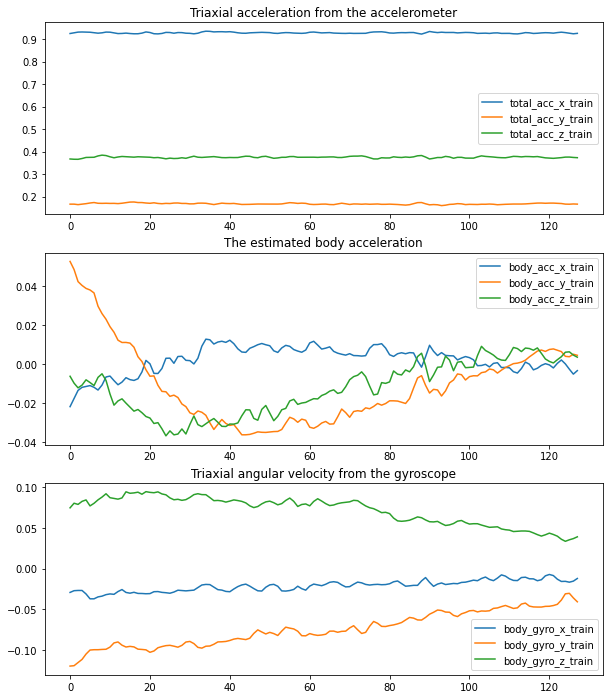

In [4]:
index = 28
fig, ax = plt.subplots(3,1,figsize=(10,12))
total_acc_x_train.iloc[index,:].plot(ax=ax[0])
total_acc_y_train.iloc[index,:].plot(ax=ax[0])
total_acc_z_train.iloc[index,:].plot(ax=ax[0])
ax[0].legend(["total_acc_x_train","total_acc_y_train","total_acc_z_train"])
ax[0].set_title("Triaxial acceleration from the accelerometer")
body_acc_x_train.iloc[index,:].plot(ax=ax[1])
body_acc_y_train.iloc[index,:].plot(ax=ax[1])
body_acc_z_train.iloc[index,:].plot(ax=ax[1])
ax[1].legend(["body_acc_x_train","body_acc_y_train","body_acc_z_train"])
ax[1].set_title("The estimated body acceleration")
body_gyro_x_train.iloc[index,:].plot(ax=ax[2])
body_gyro_y_train.iloc[index,:].plot(ax=ax[2])
body_gyro_z_train.iloc[index,:].plot(ax=ax[2])
ax[2].legend(["body_gyro_x_train","body_gyro_y_train","body_gyro_z_train"])
ax[2].set_title("Triaxial angular velocity from the gyroscope")


## EDA for features (with respect to activity)

In [5]:
X_train_path = "/Users/yuqichengzhu/Desktop/Master Arbeit/Code/UCI HAR Dataset/train/X_train.txt"
col_names = pd.read_table("./UCI HAR Dataset/features_new.txt", delim_whitespace=True, header=None)
X_train = pd.read_table(X_train_path, delim_whitespace=True, names=col_names.iloc[:,1])
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## Feature Selection (Removing Features with Low Variance + L1 based feature selection)
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification.

In [6]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

### Removing Features with Low Variance

In [7]:
thres = 0.9
selector = VarianceThreshold(threshold=(thres*(1-thres))).fit(np.array(X_train))
X_train_thres = selector.transform(np.array(X_train))

In [13]:
# get new column names
new_col_names = col_names[selector.get_support()].iloc[:,1]

### L1 based feature selection

In [19]:
y_train_path = "/Users/yuqichengzhu/Desktop/Master Arbeit/Code/UCI HAR Dataset/train/y_train.txt"
y_train = pd.read_table(y_train_path, delim_whitespace=True, header=None)
y_train = np.array(y_train)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train_thres, y_train)
importance = pd.DataFrame(data=lsvc.coef_, columns=new_col_names)
importance.loc[:, (importance != 0).any(axis=0)]

/Users/yuqichengzhu/anaconda3/envs/GNNAL/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1,tBodyAcc-mad()-X,tBodyAcc-max()-X,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,"tBodyAcc-arCoeff()-X,1","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-max()-Y,...,fBodyGyro-kurtosis()-Z,fBodyAccMag-mad(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyGyroMean,gravityMean)"
0,0.000000,-0.181350,0.000000,0.000000,0.000000,0.735886,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.015220,0.000000,0.000000,0.000000,0.000000,0.268308,0.000000,0.192648,0.000000
1,0.000000,0.000000,0.027509,0.000000,-0.156926,-0.025926,-0.032094,0.000000,-0.447432,-0.364995,...,0.490906,0.000000,0.000000,-0.083428,-0.290875,-0.298935,0.000000,0.000000,0.000000,-0.036450
2,0.332731,0.539721,0.000000,-0.373114,0.000000,-0.150383,-0.195235,0.000000,0.000000,0.000000,...,0.000000,1.217529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049056
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.957530,...,0.032749,0.000000,0.002540,0.000000,0.000000,0.000000,0.000000,0.122288,0.052001,-0.019668
4,0.000000,0.000000,0.000000,0.000000,0.049267,0.008559,0.000000,0.000000,-1.570463,-0.496130,...,0.000000,0.000000,0.044358,0.000000,0.000000,0.000000,0.000000,0.000000,0.065511,0.117089
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.343431,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


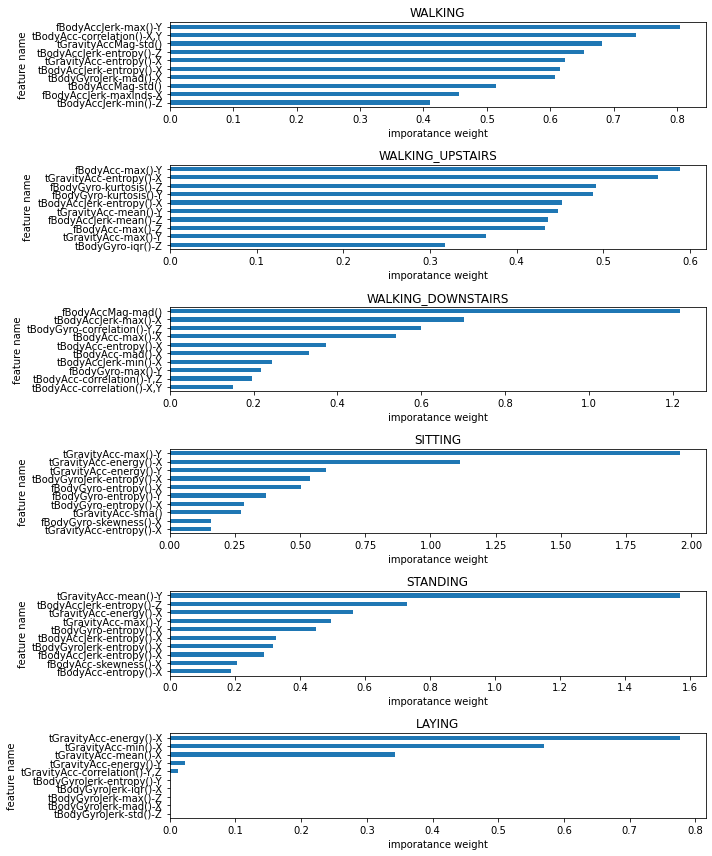

In [36]:
label_str = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
fig, ax = plt.subplots(6,1,figsize=(10,12))
for index in range(6):
    sorted_weight = importance.iloc[index,:].abs().sort_values(ascending=True)
    sorted_weight[-10:].plot.barh(ax=ax[index])
    ax[index].set_title(label_str[index])
    ax[index].set_ylabel("feature name")
    ax[index].set_xlabel("imporatance weight")
plt.tight_layout()